In [2]:
from astropy.table import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from astropy.table import hstack
import os
import seaborn as sns
from scipy.stats import binned_statistic
import matplotlib
import matplotlib.backends.backend_pdf
import matplotlib.gridspec as gridspec
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

from datetime import datetime

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [3]:
dev_path = '/Users/lejay/research/lephare_dev/my_code/'
output_dir = dev_path+'output_cats/'
graham_output_dir = dev_path + 'graham_output_cats_new/'

In [41]:
cat = Table.read(graham_output_dir+'pcat_COSMOS_deep_sfq_added_cmodel_test.fits')
cat = cat[cat['inside_u'] == True]
cat = cat[cat['inside_hsc'] == True]
cat = cat[cat['isStar']==False]
cat = cat[cat['isCompact']==False]
cat = cat[cat['snr_i']>3]
cat = cat[cat['snr_r']>1.5]
cat = cat[cat['snr_z']>1.5]
print(cat.keys())

['ID', 'RA', 'DEC', 'tract', 'patch', 'ZPHOT_G', 'ZPHOT_G_6B', 'isCompact', 'isStar', 'isOutsideMask', 'inside_hsc', 'inside_u', 'inside_uS', 'inside_j', 'u', 'u_err', 'snr_u', 'uS', 'uS_err', 'snr_uS', 'g', 'g_err', 'snr_g', 'r', 'r_err', 'snr_r', 'i', 'i_err', 'snr_i', 'z', 'z_err', 'snr_z', 'y', 'y_err', 'snr_y', 'Yv', 'Yv_err', 'snr_Yv', 'J', 'J_err', 'snr_J', 'H', 'H_err', 'snr_H', 'Ks', 'Ks_err', 'snr_Ks', 'FUV', 'FUV_err', 'snr_FUV', 'NUV', 'NUV_err', 'snr_NUV', 'cmodel_fail_flag', 'MAG_AUTO_CH1_CORR', 'MAG_AUTO_CH2_CORR', 'MAGERR_AUTO_CH1_CORR', 'MAGERR_AUTO_CH2_CORR', 'Z_COMBINE', 'MASS_MED', 'MASS_INF', 'MAG_ABS_NUV', 'MAG_ABS_r', 'MAG_ABS_Ks', 'SSFR_MED', 'SFR_MED', 'sfq_nuvrk_fc_weighted', 'sfq_nuvrk_fm_weighted', 'sfq_nuvrk_balanced', 'sfq_nuvrk_onebin_fc', 'sfq_nuvrk_onebin_fm', 'sfq_nuvrk_onebin_bal', 'HIGH_MASS_FLAG', 'i_cmodel']


In [75]:
# preparation of a massive galaxy sample for SED run

cat_prep = Table.read(graham_output_dir+'pcat_COSMOS_deep_sfq_added_cmodel_test.fits')
cat_prep = cat_prep[cat_prep['Z_COMBINE']<1.5]
cat_prep = cat_prep[cat_prep['inside_u'] == True]
cat_prep = cat_prep[cat_prep['inside_hsc'] == True]
cat_prep = cat_prep[cat_prep['isStar']==False]
cat_prep = cat_prep[cat_prep['isCompact']==False]

cat_prep = cat_prep[cat_prep['MASS_MED']>11.2]
cat_prep.remove_columns(['Z_COMBINE', 'MASS_MED','MASS_INF', 'MAG_ABS_NUV', 'MAG_ABS_r', 'MAG_ABS_Ks', 'SSFR_MED', 'SFR_MED'])
cat_prep.write(graham_output_dir+'pcat_COSMOS_deep_massive_test.fits',overwrite=True)

In [42]:
cat_cmodel_negative = cat[cat['i_cmodel']<0]
cat_cmodel_fail = cat[cat['cmodel_fail_flag']==1]
print(len(cat),len(cat_cmodel_negative),len(cat_cmodel_nonfail))
print(round(len(cat_cmodel_negative)/len(cat),3),round(len(cat_cmodel_fail)/len(cat),3))

1680312 48491 1425747
0.029 0.156


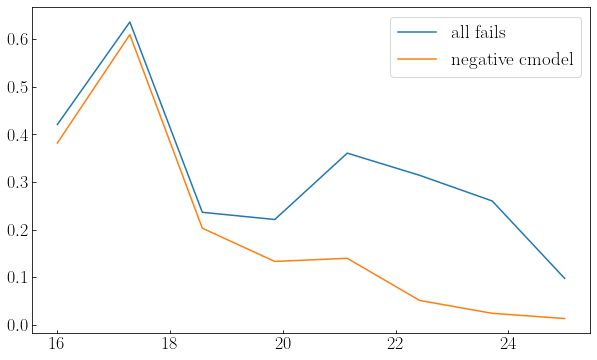

In [43]:
fig, axs = plt.subplots(1, 1, figsize = (10, 6),sharex=True)
cat_name = 'COSMOS_deep'
cat_name_full = graham_output_dir+'pcat_'+cat_name+'_sfq_added_cmodel_test.fits'

cat = Table.read(cat_name_full)
cat = cat[cat['inside_u'] == True]
cat = cat[cat['inside_hsc'] == True]
cat = cat[cat['isStar']==False]
cat = cat[cat['isCompact']==False]

frac = []
frac_neg = []
for i_mag in np.linspace(16,25,8):
    cat_magcut = cat[cat['i']>i_mag]
    cat_magcut = cat_magcut[cat_magcut['i']<i_mag+1]
    
    cat_cmodel_negative = cat_magcut[cat_magcut['i_cmodel']<0]
    cat_cmodel_fail = cat_magcut[cat_magcut['cmodel_fail_flag']==1]
    frac.append(len(cat_cmodel_fail)/len(cat_magcut))
    frac_neg.append(len(cat_cmodel_negative)/len(cat_magcut))
    
plt.plot(np.linspace(16,25,8),frac,label='all fails')
plt.plot(np.linspace(16,25,8),frac_neg,label='negative cmodel')
plt.legend(fontsize=19)

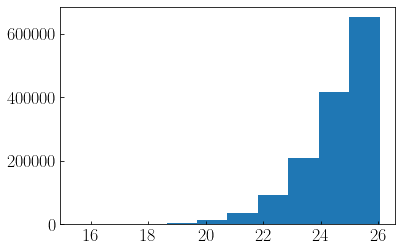

In [20]:
cat_cmodel_nonfail = cat[cat['cmodel_fail_flag']==0]
plt.hist(cat_cmodel_nonfail['i_cmodel'])
plt.show()

In [21]:
IDs = [43153640956897706, 43153666726709174, 43153774100901989, 43153778395854722, 43153778395854889, 43153795575730340, 43153928719726583, 43158189327282242, 43158193622233875, 43158193622234048, 43158313881338179, 43158331061203777, 43158339651129376, 43158464205171659, 43158464205172039, 43158464205189043, 43158468500138887, 43158593054193940, 43158597349165950, 43158597349166230, 43158597349181013, 43158610234065248, 43158717608262857, 43158717608265834, 43158730493158236, 43158743378044962, 43158743378045334, 43158867932099105, 43158867932099474, 43158872227081616, 43158876522032497, 43158880817004893, 43158880817019653, 43158885111970874, 43158885111986253, 43158996781125525, 43159009666018450, 43159022550933840, 43159129925130842, 43159138515037409, 43159142810010228, 43159147104974749, 43159155694913363, 43159155694913418, 43159159989889987]

In [70]:
cat_z = cat[(cat['Z_COMBINE']>0.45)&(cat['Z_COMBINE']<0.6)]
cat_massive = cat_z[cat_z['MASS_MED']>11.3]
print(len(cat_massive))

1438


In [54]:
### SEDs

# show SED of massive gals 
wavels = [0.3739,0.3889,0.4718,0.6135,0.7615,0.8898,0.9746,1.0186,1.2468,1.6316,2.1333,3.5133,4.4429] # effective wavelengths of filters
cols = ['u','uS','g','r','i','z','y','Yv','J','H','Ks','MAG_AUTO_CH1_CORR','MAG_AUTO_CH2_CORR']

ids_in_cat = []
for ID in IDs:
    index_in_cat = np.asarray(cat['ID']==ID).nonzero()[0][0]
    ids_in_cat.append(index_in_cat)
cat_massive_test = cat[ids_in_cat]
print(len(cat_massive_test))   

45


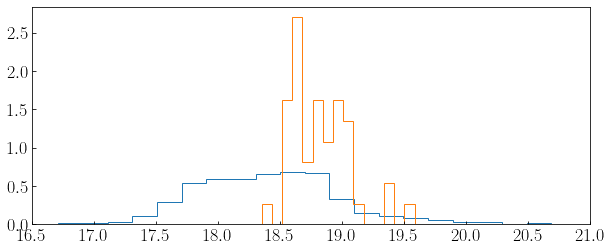

In [63]:
fig, axs = plt.subplots(1, 1, figsize = (10, 4))
plt.hist(cat_massive['i'],histtype='step',bins=30,density=True)
plt.hist(cat_massive_test['i'],histtype='step',bins=15,density=True)
plt.xlim([16.5,21])
plt.show()

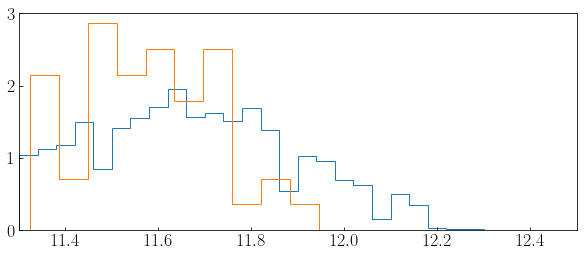

In [67]:
fig, axs = plt.subplots(1, 1, figsize = (10, 4))
plt.hist(cat_massive['MASS_MED'],histtype='step',bins=25,density=True)
plt.hist(cat_massive_test['MASS_MED'],histtype='step',bins=10,density=True)
plt.xlim([11.3,12.5])
plt.show()

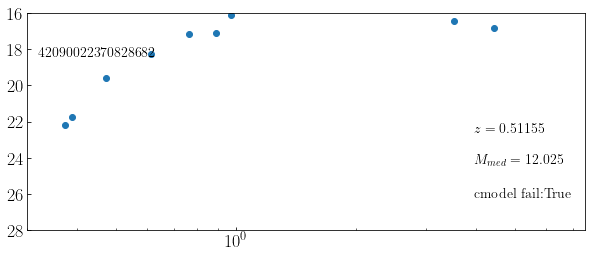

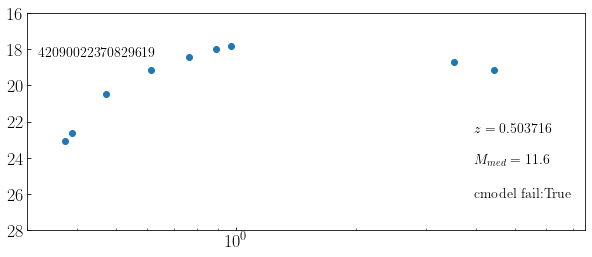

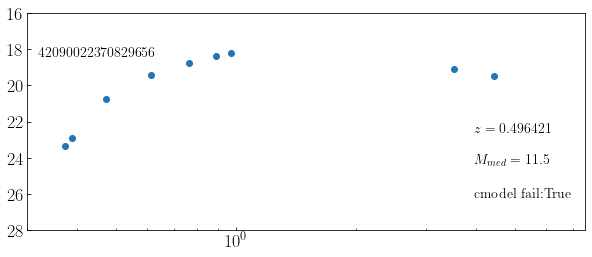

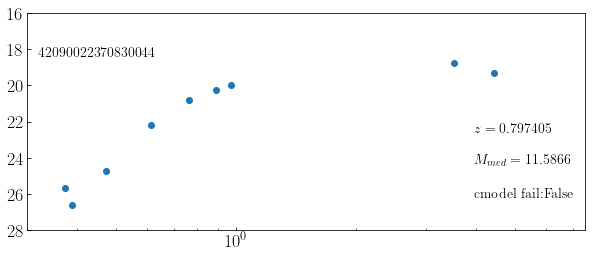

In [76]:
for gal in cat_massive[590:594]:
    fig, axs = plt.subplots(1, 1, figsize = (10, 4))
    mags = np.array(gal[cols]).tolist()

    plt.scatter(wavels,mags)
    plt.ylim([28,16])
    plt.xlim(0.3,7.5)
    plt.xscale('log')
    
    plt.annotate(str(gal['ID']),xy=([0.02,0.8]),xycoords='axes fraction',fontsize=14,color='k')
    plt.annotate('$z='+str(gal['Z_COMBINE'])+'$',xy=([0.8,0.45]),xycoords='axes fraction',fontsize=14,color='k')
    plt.annotate('$M_{med}='+str(gal['MASS_MED'])+'$',xy=([0.8,0.3]),xycoords='axes fraction',fontsize=14,color='k')
    plt.annotate('cmodel fail:'+str(bool(gal['cmodel_fail_flag'])),xy=([0.8,0.15]),xycoords='axes fraction',fontsize=14,color='k')

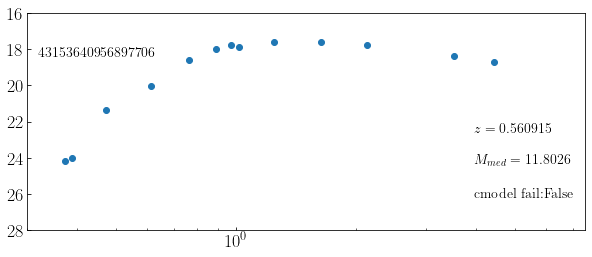

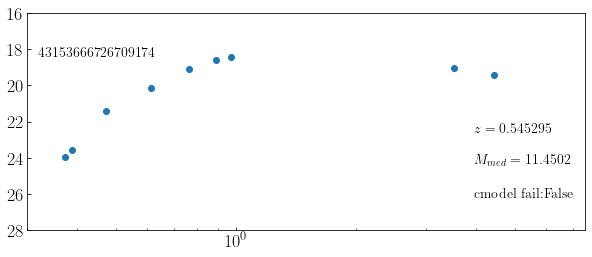

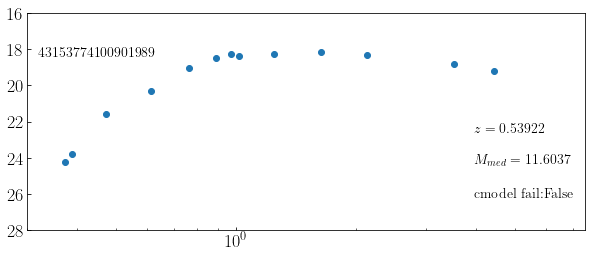

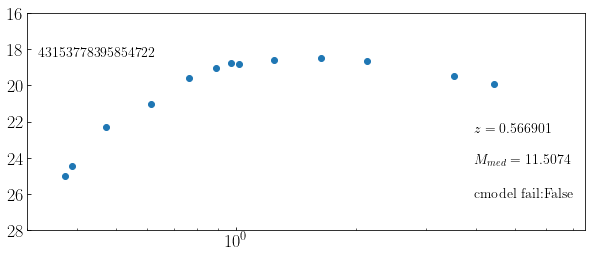

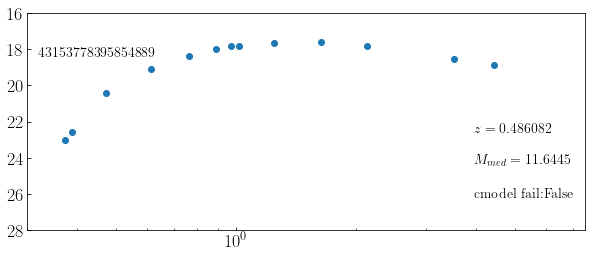

In [68]:
for gal in cat_massive_test[:5]:
    fig, axs = plt.subplots(1, 1, figsize = (10, 4))
    mags = np.array(gal[cols]).tolist()

    plt.scatter(wavels,mags)
    plt.ylim([28,16])
    plt.xlim(0.3,7.5)
    plt.xscale('log')
    
    plt.annotate(str(gal['ID']),xy=([0.02,0.8]),xycoords='axes fraction',fontsize=14,color='k')
    plt.annotate('$z='+str(gal['Z_COMBINE'])+'$',xy=([0.8,0.45]),xycoords='axes fraction',fontsize=14,color='k')
    plt.annotate('$M_{med}='+str(gal['MASS_MED'])+'$',xy=([0.8,0.3]),xycoords='axes fraction',fontsize=14,color='k')
    plt.annotate('cmodel fail:'+str(bool(gal['cmodel_fail_flag'])),xy=([0.8,0.15]),xycoords='axes fraction',fontsize=14,color='k')

#### CHI2 from LePhare

In [124]:
cat_massive_113 = Table.read('/Users/lejay/research/lephare_dev/my_code/graham_output_cats_new/pcat_cat_out_massivetest_nonir_il_nz_prior_nolimit_formass.fits')
cat_massive_113 = cat_massive_113[cat_massive_113['cmodel_fail_flag']==0]
print(len(cat_massive_113))

5984


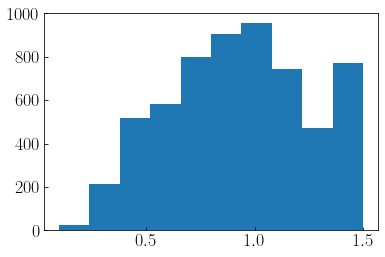

In [116]:
plt.hist(cat_massive_113['Z_COMBINE'])
plt.show()

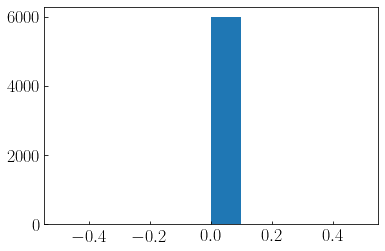

In [117]:
plt.hist(cat_massive_113['isStar'])
plt.show()

In [125]:
gal_count = 0
star_count = 0
qso_count = 0

for gal in cat_massive_113:
    if gal['CHI_BEST']<gal['CHI_QSO'] and gal['CHI_BEST']<gal['CHI_STAR']:
        gal_count += 1
    elif gal['CHI_QSO']<gal['CHI_BEST'] and gal['CHI_QSO']<gal['CHI_STAR']:
        qso_count += 1
    else:
        star_count +=1
        
print(gal_count,qso_count,star_count)

4588 1012 384


In [126]:
4588/5984

0.7667112299465241

In [119]:
ids_in_cat = []
for ID in IDs:
    index_in_cat = np.asarray(cat_massive_113['ID']==ID).nonzero()[0][0]
    ids_in_cat.append(index_in_cat)
cat_massive_test_113 = cat_massive_113[ids_in_cat]

In [120]:
gal_count = 0
star_count = 0
qso_count = 0
for gal in cat_massive_test_113:
    if gal['CHI_BEST']<gal['CHI_QSO'] and gal['CHI_BEST']<gal['CHI_STAR']:
        gal_count += 1
    elif gal['CHI_QSO']<gal['CHI_BEST'] and gal['CHI_QSO']<gal['CHI_STAR']:
        qso_count += 1
    else:
        star_count +=1
        
print(gal_count,qso_count,star_count)

1 0 44


#### psf mag vs cmodel mag

In [49]:
cat = Table.read('/Users/lejay/research/lephare_dev/my_code/graham_output_cats_new/pcat_cat_out_08squdeg_nonir_il_nz_prior_nolimit_formass.fits')
cat = cat[cat['inside_u'] == True]
cat = cat[cat['inside_hsc'] == True]

In [63]:
cat = cat[cat['i_cmodel']>0]

In [74]:
# the non-galaxy flag from LePhare
cond1 = (cat['CHI_STAR']<cat['CHI_BEST']).astype(int)
cond2 = (cat['CHI_QSO']<cat['CHI_BEST']).astype(int)
cond = (cond1+cond2)>0

In [66]:
cat_nongal = cat[cond]
print(len(cat),len(cat_nongal))

393272 238303


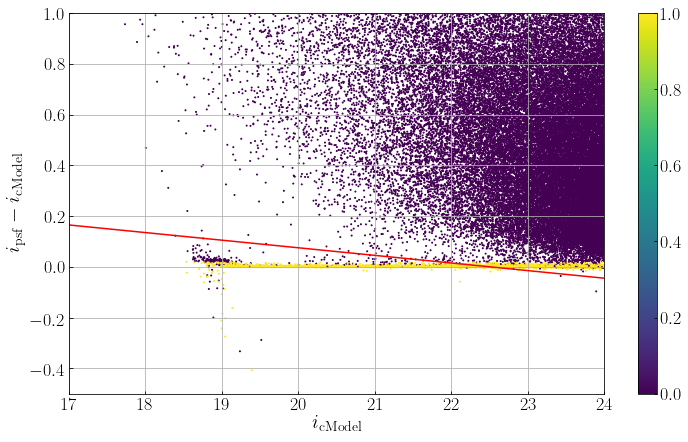

In [85]:
fig, axs = plt.subplots(1, 1, figsize = (12, 7))
im = plt.scatter(cat['i_cmodel'],cat['i_psf']-cat['i_cmodel'],s=1,c=cat['isStar'])
plt.xlim([17,24])
plt.ylim([-0.5,1])
cbar = fig.colorbar(im, ax=axs)

x_plot = np.linspace(17,24,100)
slope = -0.03
y_plot = slope*x_plot-22.5*slope
plt.plot(x_plot,y_plot,color='r')

plt.xlabel('$i_\mathrm{cModel}$',fontsize=20)
plt.ylabel('$i_\mathrm{psf}-i_\mathrm{cModel}$',fontsize=20)
plt.grid()

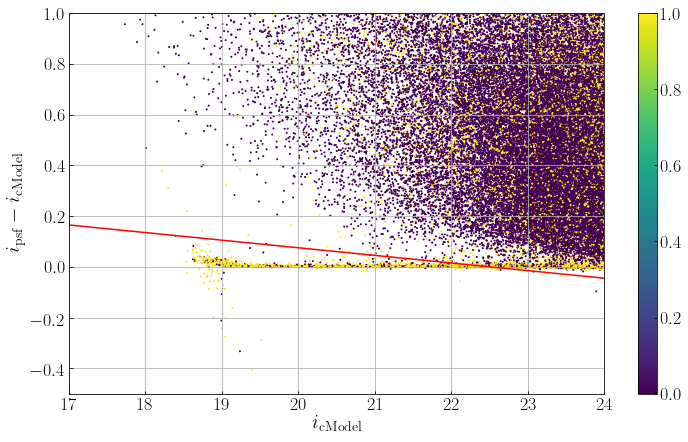

In [86]:
fig, axs = plt.subplots(1, 1, figsize = (12, 7))
im = plt.scatter(cat['i_cmodel'],cat['i_psf']-cat['i_cmodel'],s=1,c=cond)
plt.xlim([17,24])
plt.ylim([-0.5,1])
cbar = fig.colorbar(im, ax=axs)

x_plot = np.linspace(17,24,100)
slope = -0.03
y_plot = slope*x_plot-22.5*slope
plt.plot(x_plot,y_plot,color='r')

plt.xlabel('$i_\mathrm{cModel}$',fontsize=20)
plt.ylabel('$i_\mathrm{psf}-i_\mathrm{cModel}$',fontsize=20)
plt.grid()